In [ ]:
'''
Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset
Content

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

    To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
    For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot
---------------------------------------------------------------------------    
Link to project description: https://thecleverprogrammer.com/2022/01/10/classification-with-neural-networks-using-python/
Link to data: https://www.kaggle.com/datasets/zalando-research/fashionmnist?datasetId=2243&language=Python
'''


In [40]:
import pandas as pd

In [41]:
df_tr = pd.read_csv('fashion-mnist_train.csv')
df_te = pd.read_csv('fashion-mnist_test.csv')


In [ ]:
# EDA

In [46]:
df_te

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
# DATA PREPOSESSING

In [44]:
y_train = df_tr['label']
df_tr.drop(['label'],axis=1, inplace=True)

y_test = df_te['label']
df_te.drop(['label'],axis=1, inplace=True)

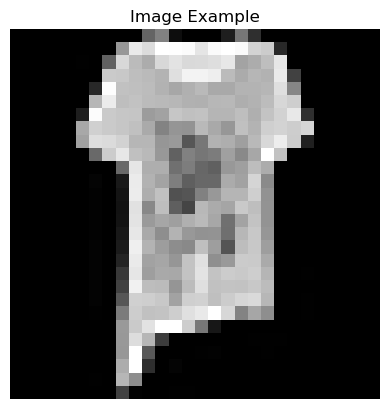

In [64]:
import numpy as np
import matplotlib.pyplot as plt

row_data = df_tr.loc[5000]

# Reshape the flattened data into a 28x28 array
image_array = np.array(row_data).reshape(28, 28)

# Create a matplotlib figure and plot the image
plt.figure()
plt.imshow(image_array, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Image Example')
plt.axis('off')  # Turn off axis labels
plt.show()

In [48]:
x_train = df_tr.values.reshape(60000,28,28,1)
x_test = df_te.values.reshape(10000,28,28,1)

In [66]:
# SETTING UP CNN DL MODEL
# in this part I benefited from one of projects explained in PBL-5)

In [55]:
import tensorflow as tf

# Assuming you've already loaded and preprocessed your training and test data (x_train, y_train, x_test, y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(10, activation='softmax')
])

# we use 'learning_rate' instead of 'lr'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(xtrain,y_train,batch_size=32, epochs = 15, verbose =1)

Epoch 1/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3624 - accuracy: 0.8709
Epoch 2/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2428 - accuracy: 0.9117
Epoch 3/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1993 - accuracy: 0.9265
Epoch 4/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1626 - accuracy: 0.9404
Epoch 5/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1307 - accuracy: 0.9520
Epoch 6/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1074 - accuracy: 0.9609
Epoch 7/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0873 - accuracy: 0.9684
Epoch 8/15
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0699 - accuracy: 0.9751
Epoch 9/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0598 - accuracy: 0.9783
Epoch 10/15
1875/1875 [==============================] - 49s 26m

In [67]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 3s 9ms/step - loss: 0.3396 - accuracy: 0.9275
Test Loss: 0.3396, Test Accuracy: 92.75%


313/313 [==============================] - 3s 9ms/step


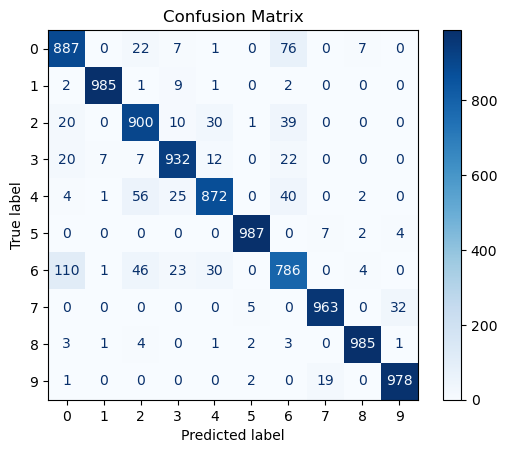

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
class_names = [str(i) for i in range(10)]  # Assuming you have 10 classes
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format="d")

plt.title("Confusion Matrix")
plt.show()